<a href="https://colab.research.google.com/github/LouisPaul2000/MNIST/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import keras as kr
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
batch_size=128
epochs=20
num_classes=10

In [ ]:
(xtrain,ytrain),(xtest,ytest)=kr.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
ytrain.shape

(60000,)

In [ ]:
xtest.shape

(10000, 28, 28)

In [ ]:
xtrain=xtrain.reshape(60000,784)
xtest=xtest.reshape(10000,784)

In [ ]:
xtrain=xtrain.astype("float32")
xtest=xtest.astype("float32")

In [ ]:
ytrain=kr.utils.to_categorical(ytrain)
ytest=kr.utils.to_categorical(ytest)

In [ ]:
ytrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
ytrain.shape

(60000, 10)

In [ ]:
model  = kr.models.Sequential()#Dangling pointer
model.add(kr.layers.Dense(512 ,activation="sigmoid" , input_shape=(784,)))
model.add(kr.layers.Dense(512 , activation="sigmoid" ))
model.add(kr.layers.Dense(10, activation="softmax" ))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
512*784+512


401920

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
hist=model.fit(xtrain , ytrain , epochs=epochs , batch_size=batch_size )

Epoch 1/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.3980 - accuracy: 0.8903
Epoch 2/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.2481 - accuracy: 0.9265
Epoch 3/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.2258 - accuracy: 0.9309
Epoch 4/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.2181 - accuracy: 0.9336
Epoch 5/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.2024 - accuracy: 0.9374
Epoch 6/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.1938 - accuracy: 0.9405
Epoch 7/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.1862 - accuracy: 0.9424
Epoch 8/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.1736 - accuracy: 0.9461
Epoch 9/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.1699 - accuracy: 0.9472
Epoch 10/20
60000/60000 [==============================

In [ ]:
model.save("model.h5")

In [ ]:
model.load_weights("model.h5")

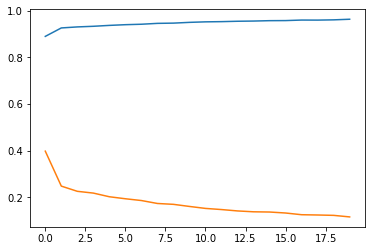

In [ ]:


plt.plot(hist.history["accuracy"])
plt.plot(hist.history["loss"])